# Comparison of Boercker and More Ornsten-Zernike 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.hnc_BandM import Integral_Equation_Solver as IET
from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n

from pandas import read_csv

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100


In [24]:
Γi = 1
Γe = 1.01

Ti = 1*eV_to_AU
Te = Γi/Γe*Ti
print(f"T_i = {Ti*AU_to_K:0.2f} [K]")
print(f"T_e = {Te*AU_to_K:0.2f} [K]")

Zi, Ze = 1, 1

ri = Zi**2/Ti/Γi
re = Ze**2/Te/Γe

ni = n_from_rs(ri)
ne = n_from_rs(re)

m_i = m_e*1

T_i = 11604.53 [K]
T_e = 11489.63 [K]


In [25]:
n_in_rs_array = np.array([ 3/(4*π), 3/(4*π)] )
T_AU_array = np.array([Te, Ti])
mass_array = np.array([m_e, m_i])
iet = IET(2, n_in_rs_array, T_AU_array, mass_array, κ_screen=0 )

In [26]:
iet.HNC_solve(num_iterations=1e4, tol=1e-6, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 1e-3, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

0: Initial condition Total Error: 3.325e+18
1: Change in U_r: 8.247e+00, HNC Error: 4.147e-01, Total Error: 1.225e+18
2: Change in U_r: 6.788e+00, HNC Error: 4.089e-01, Total Error: 4.508e+17
3: Change in U_r: 5.673e+00, HNC Error: 4.037e-01, Total Error: 1.659e+17
4: Change in U_r: 4.833e+00, HNC Error: 3.990e-01, Total Error: 6.104e+16
5: Change in U_r: 4.192e+00, HNC Error: 3.949e-01, Total Error: 2.245e+16
6: Change in U_r: 3.695e+00, HNC Error: 3.911e-01, Total Error: 8.248e+15
7: Change in U_r: 3.304e+00, HNC Error: 3.888e-01, Total Error: 3.095e+15
8: Change in U_r: 2.989e+00, HNC Error: 3.843e-01, Total Error: 1.118e+15
9: Change in U_r: 2.733e+00, HNC Error: 3.813e-01, Total Error: 4.125e+14
10: Change in U_r: 2.522e+00, HNC Error: 3.790e-01, Total Error: 1.522e+14
11: Change in U_r: 2.346e+00, HNC Error: 3.774e-01, Total Error: 5.740e+13
12: Change in U_r: 2.195e+00, HNC Error: 3.738e-01, Total Error: 2.058e+13
13: Change in U_r: 2.067e+00, HNC Error: 3.717e-01, Total Error: 


KeyboardInterrupt



(<Figure size 2000x1200 with 4 Axes>,
 array([[<Axes: title={'center': ', $\\Gamma_{ 0,0 }$ = 1.00'}, ylabel='$g(r/r_s)$'>,
         <Axes: title={'center': ', $\\Gamma_{ 0,1 }$ = 1.00'}>],
        [<Axes: title={'center': ', $\\Gamma_{ 1,0 }$ = 1.00'}, xlabel='$r/r_s$', ylabel='$g(r/r_s)$'>,
         <Axes: title={'center': ', $\\Gamma_{ 1,1 }$ = 1.00'}, xlabel='$r/r_s$'>]],
       dtype=object))

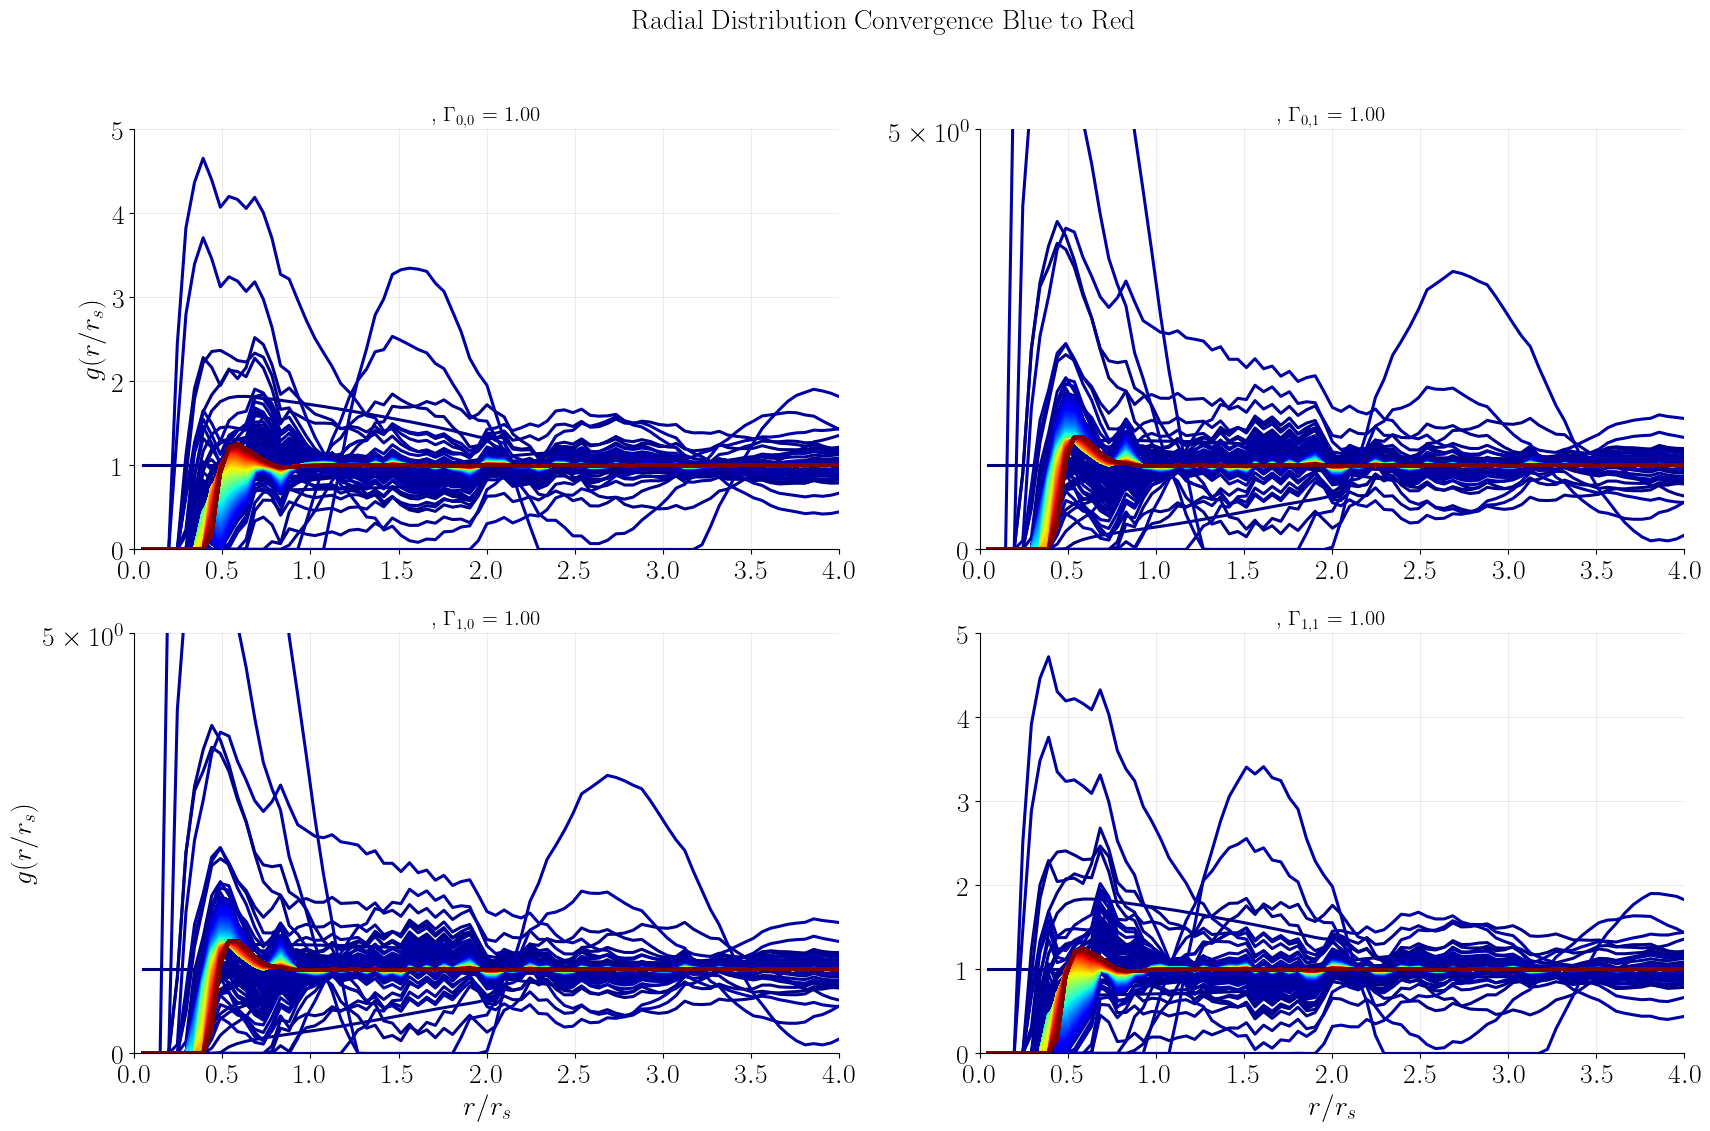

In [27]:
iet.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::1]))

axs


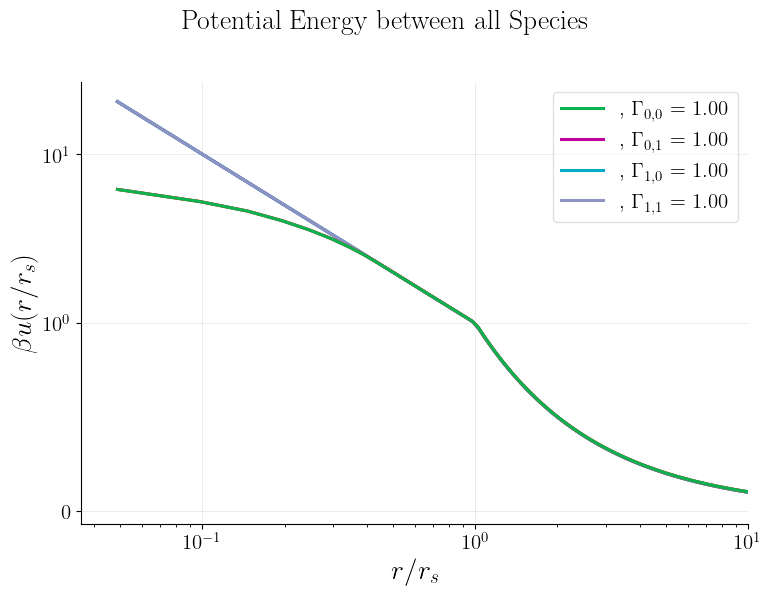

In [29]:
fig, ax =  iet.plot_u_all_species()
ax.plot(iet.r_array, iet.U_r_matrix[0,0])
ax.plot(iet.r_array, iet.U_r_matrix[1,1])
ax.plot(iet.r_array, iet.U_r_matrix[0,1])

In [ ]:
n_in_rs_array = np.array([ 3/(4*π), 3/(4*π)] )
T_AU_array = np.array([Te, Ti])
mass_array = np.array([m_e, m_i])
iet = IET(1, n_in_rs_array[0:1], T_AU_array[0:1], mass_array[0:1], κ_screen=0 )

iet.HNC_solve(num_iterations=1e4, tol=1e-6, iters_to_wait=3e4, iters_to_use=3, alpha_Ng = 1e-3 ,
        alpha_Picard = 5e-3, alpha_oz = 0., iters_to_check=10 ,verbose=True, min_iters=20)

In [ ]:
iet.plot_species_convergence_g(n_slices = len(iet.h_r_matrix_list[::10]))

In [ ]:
fig, ax =  iet.plot_u_all_species()
ax.plot(iet.r_array, iet.U_r_matrix[0,0])
